In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Read In Data & Data Prep

In [3]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("../1/data/train.csv")

In [4]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1.98


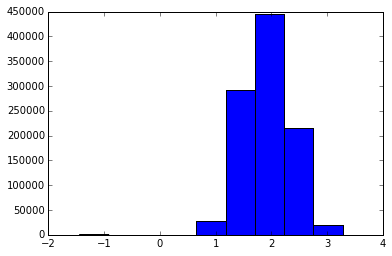

In [5]:
#first do some exploratory data analysis, and we find that 
#the distribution of gap is quite symmetric.
plt.hist(df_train['gap'])
plt.show()

In [6]:
df_test = pd.read_csv("../1/data/test.csv")
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
#store gap values
Y_train = df_train.gap.values
#row where testing examples start
test_idx = df_train.shape[0]
#delete 'Id' column
df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column
df_train = df_train.drop(['gap'], axis=1)

In [8]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
"""
Example Feature Engineering

this calculates the length of each smile string and adds a feature column with those lengths
Note: this is NOT a good feature and will result in a lower score!
"""
length = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
df_all['carbon'] = df_all['smiles'].apply(lambda r: r.count('c') + r.count('C'))
df_all['oxygen'] = df_all['smiles'].apply(lambda r: r.count('o'))
df_all['nitrogen'] = df_all['smiles'].apply(lambda r: r.count('n'))
df_all['sulfur'] = df_all['smiles'].apply(lambda r: r.count('s'))
df_all['hydrogen'] = df_all['smiles'].apply(lambda r: r.count('H'))
df_all['[]'] = df_all['smiles'].apply(lambda r: r.count('['))
df_all['()'] = df_all['smiles'].apply(lambda r: r.count('('))
df_all['onelink']=df_all['smiles'].apply(lambda r: r.count('-'))
df_all['doublelink']=df_all['smiles'].apply(lambda r: r.count('='))
df_all['1']=df_all['smiles'].apply(lambda r: r.count('1'))
df_all['2']=df_all['smiles'].apply(lambda r: r.count('2'))
df_all['3']=df_all['smiles'].apply(lambda r: r.count('3'))
df_all['4']=df_all['smiles'].apply(lambda r: r.count('4'))
df_all['5']=df_all['smiles'].apply(lambda r: r.count('5'))
df_all['6']=df_all['smiles'].apply(lambda r: r.count('6'))
df_all['p_carbon'] = df_all['smiles'].apply(lambda r: (r.count('c') + r.count('C'))/len(r))
df_all['p_oxygen'] = df_all['smiles'].apply(lambda r: r.count('o')/len(r))
df_all['p_nitrogen'] = df_all['smiles'].apply(lambda r: r.count('n')/len(r))
df_all['p_sulfur'] = df_all['smiles'].apply(lambda r: r.count('s')/len(r))
df_all['p_hydrogen'] = df_all['smiles'].apply(lambda r: r.count('H')/len(r))
df_all['p_[]'] = df_all['smiles'].apply(lambda r: r.count('[')/len(r))
df_all['p_()'] = df_all['smiles'].apply(lambda r: r.count('(')/len(r))
df_all['p_onelink']=df_all['smiles'].apply(lambda r: r.count('-')/len(r))
df_all['p_doublelink']=df_all['smiles'].apply(lambda r: r.count('=')/len(r))

In [ ]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [10]:
df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,6,p_carbon,p_oxygen,p_nitrogen,p_sulfur,p_hydrogen,p_[],p_(),p_onelink,p_doublelink
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Drop the 'smiles' column
df_all = df_all.drop(['smiles'], axis=1)
lcols = df_all.columns.values.tolist()
vals = df_all.values
X_train = vals[:test_idx]
X_test = vals[test_idx:]
print "Train features:", X_train.shape
print "Train gap:", Y_train.shape
print "Test features:", X_test.shape

Train features: (1000000, 280)
Train gap: (1000000,)
Test features: (824230, 280)


In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

print "The Random Forest Regressor MSE is %0.4f" %RF.score(X_train,Y_train)
RF_pred = RF.predict(X_train)
print "Train data MSE is ",mean_squared_error(Y_train,RF_pred)

In [ ]:
RF_pred_test = RF.predict(X_test)

In [ ]:
RF_pred_test.shape
write_to_file("RF-chemical.csv", RF_pred_test)


# Baseline

In [38]:
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train, Y_train)

print "The Linear Regression Score is %0.4f" %LR.score(X_train,Y_train)
LR_pred = LR.predict(X_train)
print "Train data MSE is ",mean_squared_error(Y_train,LR_pred)

The Linear Regression Score is 1.0000
Train data MSE is  4.01332376259e-29


In [13]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

print "The Random Forest Regressor MSE is %0.4f" %RF.score(X_train,Y_train)
RF_pred = RF.predict(X_train)
print "Train data MSE is ",mean_squared_error(Y_train,RF_pred)

The Random Forest Regressor MSE is 0.5542
Train data MSE is  0.0739172340539


# Feature Reduction

## Feature reduction using PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(X_train, Y_train)
print(pca.explained_variance_ratio_)
pca_components = pca.components_

[  2.76081465e-01   1.59972425e-01   1.15301757e-01   8.90472885e-02
   7.40744684e-02   4.92047246e-02   4.40554673e-02   3.63085238e-02
   3.21632895e-02   2.26566731e-02   1.92636921e-02   1.41765412e-02
   8.93850942e-03   8.65251544e-03   6.47451957e-03   4.72463112e-03
   4.35919750e-03   3.94628535e-03   3.69395853e-03   3.48938200e-03
   3.11493820e-03   2.74259107e-03   2.59550503e-03   2.41449257e-03
   1.92857343e-03   1.64479114e-03   1.50181240e-03   1.15086407e-03
   1.09598034e-03   1.03249368e-03   8.60642578e-04   7.46830375e-04
   6.54927007e-04   6.26435715e-04   4.26062217e-04   2.90293188e-04
   2.71942157e-04   1.33252205e-04   1.04085415e-04   4.41414199e-05
   3.30775083e-05   5.88036648e-07   3.66686051e-07   4.23886864e-30
   5.44474685e-32   1.13116818e-32   3.93338679e-33   2.41759273e-33
   1.02471034e-33   1.02471034e-33]


In [13]:
X_train_pca = pca.fit_transform(X_train[:5000], Y_train[:5000])

In [17]:
X_train_pca.shape

(5000, 50)

In [18]:
Y_train.shape

(1000000,)

In [14]:
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train_pca, Y_train)

print "The Linear Regression Score is %0.4f" %LR.score(X_train_pca,Y_train)
LR_pred = LR.predict(X_train_pca)
print "Train data MSE is ",mean_squared_error(Y_train,LR_pred)

The Linear Regression Score is 0.4610
Train data MSE is  0.0893565916881


In [15]:
from sklearn.ensamble.RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train_pca, Y_train)

print "The Random Forest Regressor MSE is %0.4f" %RF.score(X_train_pca,Y_train)
RF_pred = RF.predict(X_train_pca)
print "Train data MSE is ",mean_squared_error(Y_train,RF_pred)

The Random Forest Regressor MSE is 0.5542
Train data MSE is  0.0739171315696


### Emsemble Methods 

In [51]:
RF = RandomForestRegressor(n_jobs = -1)
ridge, Xtrain, ytrain, Xtest, ytest = do_regress(RF, {"n_estimators": [10, 20, 50]},
                                                 X_train_pca, Y_train,mask=mask,score_func="mean_squared_error")

NameError: name 'do_regress' is not defined

## AdaBoost 

In [19]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
AB = AdaBoostRegressor(RandomForestRegressor(n_estimators=50))
AB.fit(X_train_pca, Y_train[:5000])
print "The Random Forest Regressor MSE is %0.4f" %AB.score(X_train_pca,Y_train[:5000])

The Random Forest Regressor MSE is 0.9628


In [ ]:
AB_pred = AB.predict(X_train_pca)
print "Train data MSE is ",mean_squared_error(Y_train,AB_pred)

In [ ]:
write_to_file("AB_pred.csv", AB_pred)


In [ ]:
def cv_optimize(clf,parameters,X,y,n_folds,score_func=None):
    if score_func:
        fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    fitmodel.fit(X,y)
    print "BEST", fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    best = fitmodel.best_estimator_
    return best

In [ ]:
def do_regress(clf, parameters,X,y,mask=None, reuse_split=None, score_func=None, n_folds=5):
    
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.5f" % (training_accuracy)
    print "Accuracy on test data:     %0.5f" % (test_accuracy)
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [ ]:
def nonzero(clf):
    featuremask=(clf.coef_ !=0.0)
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_, abscoef=np.abs(clf.coef_)))[featuremask].sort('abscoef', ascending=False)

### Ridge Regression

In [51]:
ridge, Xtrain, ytrain, Xtest, ytest = do_regress(Ridge(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                    X_train_pca, Y_train,mask=mask,score_func="mean_squared_error")

using mask
BEST {'alpha': 10.0} -0.0892598130548 [mean: -0.08926, std: 0.00041, params: {'alpha': 0.001}, mean: -0.08926, std: 0.00041, params: {'alpha': 0.01}, mean: -0.08926, std: 0.00041, params: {'alpha': 0.1}, mean: -0.08926, std: 0.00041, params: {'alpha': 1.0}, mean: -0.08926, std: 0.00041, params: {'alpha': 10.0}, mean: -0.08927, std: 0.00041, params: {'alpha': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.46157
Accuracy on test data:     0.45976
########################################################


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


### Lasso Regression

In [54]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(X_train_pca.shape[0]), train_size=0.7)
mask=np.ones(X_train_pca.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [56]:
from sklearn.linear_model import Lasso 
lasso, Xtrain, ytrain, Xtest, ytest = do_regress(Lasso(), \
                                                   {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},\
                                                   X_train,Y_train,mask=mask)

### Stochastic Gradient Descent - SGD¶

In [65]:
from sklearn import linear_model
SGD = linear_model.SGDRegressor()
SGD, Xtrain, ytrain, Xtest, ytest = do_regress(SGD, {"alpha": [1e-6, 0.001, 0.01, 0.1, 1.0]},
                                                    X_train_pca, Y_train,mask=mask,score_func="mean_squared_error")

using mask
BEST {'alpha': 1e-06} -0.0894535074507 [mean: -0.08945, std: 0.00039, params: {'alpha': 1e-06}, mean: -0.08949, std: 0.00042, params: {'alpha': 0.001}, mean: -0.09060, std: 0.00040, params: {'alpha': 0.01}, mean: -0.10038, std: 0.00043, params: {'alpha': 0.1}, mean: -0.13701, std: 0.00037, params: {'alpha': 1.0}]
############# based on standard predict ################
Accuracy on training data: 0.46081
Accuracy on test data:     0.46072
########################################################


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


### Bayesian Ridge Regression

In [66]:
BayesianRidge = linear_model.BayesianRidge()
BayesianRidge, Xtrain, ytrain, Xtest, ytest = do_regress(BayesianRidge, {"alpha_1": [1e-6, 0.001, 0.01, 0.1, 1.0], "alpha_2": [1e-6, 0.001, 0.01, 0.1, 1.0]},
                                                    X_train_pca, Y_train,mask=mask,score_func="mean_squared_error")

using mask
BEST {'alpha_2': 1.0, 'alpha_1': 1e-06} -0.0893432903939 [mean: -0.08934, std: 0.00041, params: {'alpha_2': 1e-06, 'alpha_1': 1e-06}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 0.001, 'alpha_1': 1e-06}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 0.01, 'alpha_1': 1e-06}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 0.1, 'alpha_1': 1e-06}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 1.0, 'alpha_1': 1e-06}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 1e-06, 'alpha_1': 0.001}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 0.001, 'alpha_1': 0.001}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 0.01, 'alpha_1': 0.001}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 0.1, 'alpha_1': 0.001}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 1.0, 'alpha_1': 0.001}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 1e-06, 'alpha_1': 0.01}, mean: -0.08934, std: 0.00041, params: {'alpha_2': 0.001, 'alpha_1': 0.01}, mean: -0.08934, std: 0.00041, p

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


### Adaboost

In [ ]:
AB = AdaBoostRegressor(RandomForestRegressor(n_estimators=50))


### ElasticNetCV

In [73]:
EN = linear_model.ElasticNetCV()
EN.fit(X_train_pca, Y_train)

print "The Linear Regression Score is %0.4f" %EN.score(X_train_pca,Y_train)
EN_pred = EN.predict(X_train_pca)
print "Train data MSE is ",mean_squared_error(Y_train,EN_pred)

The Linear Regression Score is 0.4608
Train data MSE is  0.0893973458867


### Orthogonal Matching Pursuit

In [72]:
OMP = linear_model.OrthogonalMatchingPursuit()
OMP.fit(X_train_pca, Y_train)

print "The Linear Regression Score is %0.4f" %OMP.score(X_train_pca,Y_train)
EN_pred = OMP.predict(X_train_pca)
print "Train data MSE is ",mean_squared_error(Y_train,EN_pred)

The Linear Regression Score is 0.3429
Train data MSE is  0.108934078892


## Feature Reduction Using Pearsonr

In [26]:
X_train.T[1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [26]:
from scipy.stats.stats import pearsonr
correlations=[]
for col in xrange(X_train_pca.shape[1]):
    r=pearsonr(X_train_pca.T[col], Y_train)[0]
    correlations.append(dict(feature=lcols[col],corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abscorr,corr
feature,,
feat_005,0.363979,-0.363979
feat_003,0.330177,-0.330177
feat_007,0.318515,-0.318515
feat_001,0.173378,-0.173378
feat_009,0.170262,0.170262
feat_015,0.138328,0.138328
feat_017,0.096622,0.096622
feat_022,0.081951,0.081951
feat_014,0.070313,-0.070313


In [27]:
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
def cv_optimize_ridge(X, y, n_folds=4):
    clf = Ridge()
    parameters = {"alpha": [1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0,10.0,100.0]}
    #the scoring parameter below is the default one in ridge, but you can use a different one
    #in the cross-validation phase if you want.
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs
fitmodel = cv_optimize_ridge(X_train_pca, Y_train, n_folds=4)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 {'alpha': 10.0},
 -0.089361855421948064,
 [mean: -0.08936, std: 0.00031, params: {'alpha': 1e-06},
  mean: -0.08936, std: 0.00031, params: {'alpha': 1e-05},
  mean: -0.08936, std: 0.00031, params: {'alpha': 5e-05},
  mean: -0.08936, std: 0.00031, params: {'alpha': 0.0001},
  mean: -0.08936, std: 0.00031, params: {'alpha': 0.0005},
  mean: -0.08936, std: 0.00031, params: {'alpha': 0.001},
  mean: -0.08936, std: 0.00031, params: {'alpha': 0.01},
  mean: -0.08936, std: 0.00031, params: {'alpha': 0.1},
  mean: -0.08936, std: 0.00031, params: {'alpha': 1.0},
  mean: -0.08936, std: 0.00031, params: {'alpha': 10.0},
  mean: -0.08937, std: 0.00031, params: {'alpha': 100.0}])

In [28]:
def nonzero(clf):
    featuremask=(clf.coef_ !=0.0)
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_, abscoef=np.abs(clf.coef_)))[featuremask].sort('abscoef', ascending=False)

In [43]:
ridge_importances=nonzero(fitmodel.best_estimator_)
ridge_importances.set_index("feature", inplace=True)
ridge_importances.head(20)

ValueError: arrays must all be same length

In [36]:
def cv_optimize(clf,parameters,X,y,n_folds,score_func=None):
    if score_func:
        fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    fitmodel.fit(X,y)
    print "BEST", fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    best = fitmodel.best_estimator_
    return best

In [37]:
def do_regress(clf, parameters, indf, featurenames, y ,mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [38]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(X_train_pca.shape[0]), train_size=0.7)
mask=np.ones(X_train_pca.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [44]:
lasso=cv_optimize(Lasso(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, X_train_pca, Y_train, n_folds=5, score_func="mean_squared_error")

BEST {'alpha': 0.001} -0.09037279458 [mean: -0.09037, std: 0.00028, params: {'alpha': 0.001}, mean: -0.10039, std: 0.00021, params: {'alpha': 0.01}, mean: -0.16305, std: 0.00042, params: {'alpha': 0.1}, mean: -0.16579, std: 0.00041, params: {'alpha': 1.0}, mean: -0.16579, std: 0.00041, params: {'alpha': 10.0}, mean: -0.16579, std: 0.00041, params: {'alpha': 100.0}]


In [40]:
from sklearn.linear_model import Lasso 
lasso, Xtrain, ytrain, Xtest, ytest = do_regress(Lasso, \
                                                   {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},\
                                                   df_train, lcols, Y_train,mask=mask)

using mask


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


TypeError: unbound method get_params() must be called with Lasso instance as first argument (got nothing instead)

In [ ]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [ ]:
write_to_file("sample1.csv", LR_pred)
write_to_file("sample2.csv", RF_pred)